# BDI

## ARIMA

In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

In [2]:
df= pd.read_csv('Baltic Dry Index Historical Data.csv',parse_dates=['Date'],index_col=['Date'])
df.head()

,BDI
Date,
2012-07-04,1103.0
2012-07-05,1138.0
2012-07-06,1157.0
2012-07-07,1159.5
2012-07-08,1159.5


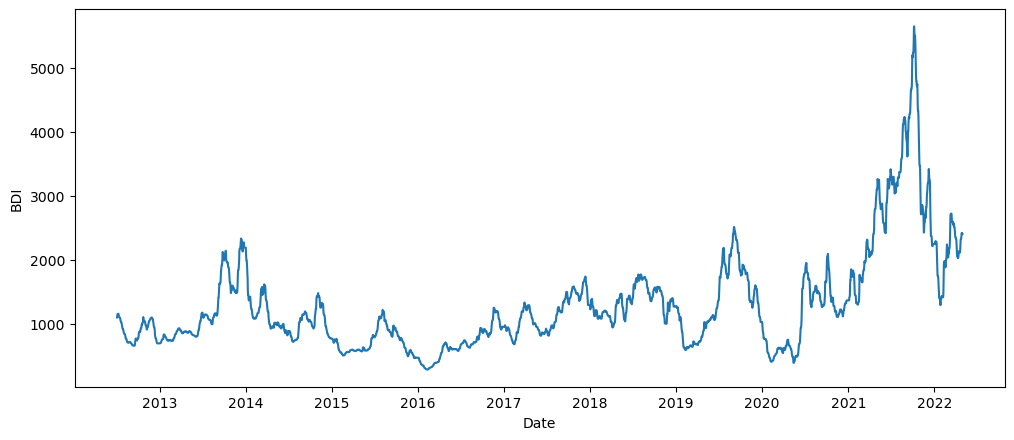

In [3]:
plt.figure(figsize=(12,5), dpi=100)
plt.xlabel('Date')
plt.ylabel('BDI')
plt.plot(df)

In [4]:
result=adfuller(df['BDI'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-2.437065154295423
p-value:0.13154708852916003
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


In [5]:
df_shift=df.diff().dropna()

In [6]:
df

,BDI
Date,
2012-07-04,1103.0
2012-07-05,1138.0
2012-07-06,1157.0
2012-07-07,1159.5
2012-07-08,1159.5
...,...
2022-04-26,2404.0
2022-04-27,2425.0
2022-04-28,2403.0


In [7]:
result=adfuller(df_shift['BDI'])
print('statistiques ADf:{}'.format(result[0]))
print('p-value:{}'.format(result[1]))
print('valeurs critiques:')
for key, value in result[4].items():
    print('\t {} : {}'.format(key,value))

statistiques ADf:-12.145396822282459
p-value:1.6151369416805567e-22
valeurs critiques:
	 1% : -3.4321892422972575
	 5% : -2.8623526737372837
	 10% : -2.5672025996313876


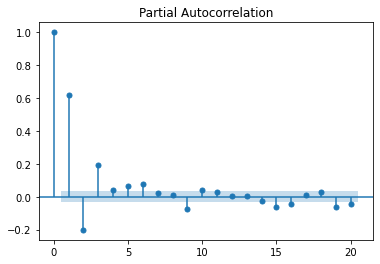

In [8]:
plot_pacf(df_shift,lags=20)
plt.show()

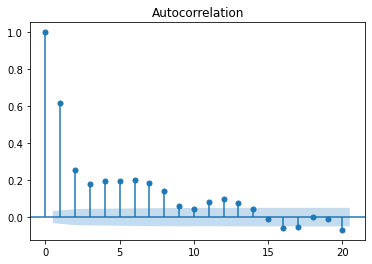

In [9]:
plot_acf(df_shift,lags=20)
plt.show()

In [21]:
p = range(1,10)
d = range(1,2)
q = range(1,10)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(len(pdq))

81


In [24]:
X = df.BDI.values
bic=[]
param1=[]
warnings.filterwarnings("ignore")
for param in pdq:
    
    try:
        model = SARIMAX(X,order=param)
        model_fit = model.fit()
        a = model_fit.bic
        param1.append(param)
        bic.append(a)
        print('ARIMA{} - BIC:{}'.format(param,a ))
    except:
        continue
print(bic)
mini = min(bic)
index = bic.index(mini)
print('selscted ARIMA model is ARIMA{} - BIC:{}'.format(param1[index],mini))

ARIMA(1, 1, 1) - BIC:33796.938574313135
ARIMA(1, 1, 2) - BIC:33772.79069169839
ARIMA(1, 1, 3) - BIC:33742.81289183139
ARIMA(1, 1, 4) - BIC:33735.77860061707
ARIMA(1, 1, 5) - BIC:33742.16864141505
ARIMA(1, 1, 6) - BIC:33738.194219522586
ARIMA(1, 1, 7) - BIC:33746.30949767845
ARIMA(1, 1, 8) - BIC:33748.17121614081
ARIMA(1, 1, 9) - BIC:33753.442963243135
ARIMA(2, 1, 1) - BIC:33803.45979620462
ARIMA(2, 1, 2) - BIC:33754.1601575004
ARIMA(2, 1, 3) - BIC:33735.9304598521
ARIMA(2, 1, 4) - BIC:33733.29366999189
ARIMA(2, 1, 5) - BIC:33727.17718025393
ARIMA(2, 1, 6) - BIC:33746.4861823855
ARIMA(2, 1, 7) - BIC:33754.56426787468
ARIMA(2, 1, 8) - BIC:33755.436287008444
ARIMA(2, 1, 9) - BIC:33760.89741097915
ARIMA(3, 1, 1) - BIC:33736.80350059089
ARIMA(3, 1, 2) - BIC:33735.66344734487
ARIMA(3, 1, 3) - BIC:33740.0452344328
ARIMA(3, 1, 4) - BIC:33750.90512358732
ARIMA(3, 1, 5) - BIC:33731.28096913783
ARIMA(3, 1, 6) - BIC:33724.648665833185
ARIMA(3, 1, 7) - BIC:33726.66552190289
ARIMA(3, 1, 8) - BIC:337

df_shift.BDI.values


### prédiction d'un jour

In [10]:
train=df[:-30]

In [12]:
p=-30
prédictions=[]
maes=0
_list_maes=[]
rmses=0
_list_rmses=[]
values=[]
for i in range(30):
    train_df=df[:p]
    if p==-1:
        test_df=df[-1:]
    else:
        test_df=df[p:p+1]
    model = SARIMAX(train_df.BDI.values, order=((4,1,5)))
    fitted = model.fit(maxiter=200)
    fc = fitted.forecast(1, alpha=0.05)
    serie=pd.Series(fc,index=test_df.index)
    values.append(serie.values.reshape((1,)))
    prédictions.append(serie)
    _list_maes.append(np.mean(np.abs(serie - test_df.BDI)))
    _list_rmses.append(np.mean((serie - test_df.BDI)**2)**.5)
    maes=maes+np.mean(np.abs(serie - test_df.BDI))
    rmses=rmses+np.mean((serie - test_df.BDI)**2)**.5
    p+=1
maes=maes/30
rmses=rmses/30

In [17]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3587
Model:               SARIMAX(4, 1, 5)   Log Likelihood              -16813.391
Date:                Sun, 03 Jul 2022   AIC                          33646.781
Time:                        20:28:52   BIC                          33708.629
Sample:                             0   HQIC                         33668.827
                               - 3587                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2039      0.058     20.632      0.000       1.090       1.318
ar.L2         -0.5246      0.108     -4.841      0.000      -0.737      -0.312
ar.L3         -0.4872      0.106     -4.597      0.000      -0.695      -0.279
ar.L4          0.6083      0.049     12.469      0.000       0.513       0.704
ma.L1         -0.4403      0.058     -7.621      0.000      -0.554      -0.327
ma.L2         -0.1345      0.066     -2.042      0.041      -0.264      -0.005
ma.L3          0.7035      0.045     15.519      0.000       0.615       0.792
ma.L4         -0.1166      0.018     -6.550      0.000      -0.151      -0.082
ma.L5         -0.3388      0.021    -16.378      0.000      -0.379      -0.298
sigma2       691.1884      6.262    110.372      0.000     678.914     703.462
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             25439.73
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.44   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# 18 7 
from datetime import datetime
datetime.now()

datetime.datetime(2022, 7, 3, 18, 23, 52, 296587)

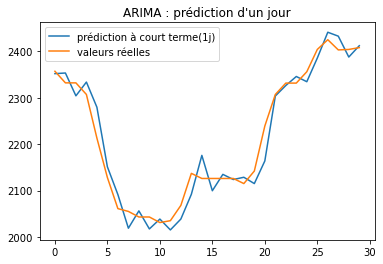

In [14]:
plt.plot(np.array(prédictions).reshape(30,),label='prédiction à court terme(1j)')
plt.plot(df[-30:].values,label='valeurs réelles')
plt.title("ARIMA : prédiction d'un jour")
plt.legend()

In [15]:
maes,rmses

(23.669160656424506, 23.669160656424506)

### prédiction de 30 j

In [19]:

p=-300
prédictions=[]
maes=0
_list_maes=[]
rmses=0
_list_rmses=[]
values=[]
for i in range(10):
    train_df=df[:p]
    if p==-30:
        test_df=df[-30:]
    else:
        test_df=df[p:p+30]
    model = SARIMAX(train_df.BDI.values, order=((4,1,5)))
    fitted = model.fit(maxiter=200)
    fc = fitted.forecast(30, alpha=0.05)
    serie=pd.Series(fc,index=test_df.index)
    values.append(serie.values.reshape((30,)))
    prédictions.append(serie)
    _list_maes.append(np.mean(np.abs(serie - test_df.BDI)))
    _list_rmses.append(np.mean((serie - test_df.BDI)**2)**.5)
    maes=maes+np.mean(np.abs(serie - test_df.BDI))
    rmses=rmses+np.mean((serie - test_df.BDI)**2)**.5
    p+=30
maes=maes/10
rmses=rmses/10

In [20]:
maes,rmses#(476.7217571221878, 570.722070034243)

(416.2120913682522, 504.85952380645875)

In [21]:
_list_maes

[87.11939094141046,
 485.46233175828314,
 487.224457124099,
 807.5125601978909,
 342.6893408957273,
 545.5022874419216,
 430.4638246598278,
 436.29148585575336,
 406.87839995049296,
 132.97683485711522]

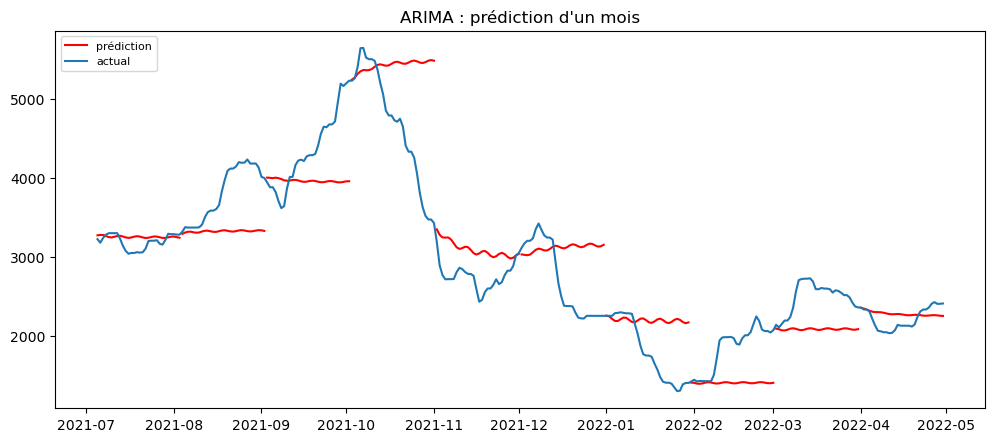

In [22]:
plt.figure(figsize=(12,5), dpi=100)
for i in range(len(prédictions)):
    if i==0:
        plt.plot(prédictions[i],color='r',label='prédiction')
    else:
        plt.plot(prédictions[i],color='r')
plt.plot(df[-300:].BDI, label='actual')

plt.title("ARIMA : prédiction d'un mois")
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
values

[array([3272.70322395, 3277.45954792, 3277.20986623, 3261.94913237,
        3250.37897301, 3245.47004911, 3254.52118493, 3263.66796768,
        3266.71956302, 3257.34064231, 3245.80760335, 3239.94259633,
        3245.85656397, 3255.94297838, 3261.61168197, 3256.49962047,
        3245.99441094, 3238.78580518, 3241.60018013, 3250.90086353,
        3258.28375478, 3256.6270805 , 3247.82985384, 3239.70541642,
        3239.67481432, 3247.27327661, 3255.46072699, 3256.62895344,
        3249.96552191, 3241.59855325]),
 array([3290.80251155, 3308.38313835, 3317.866297  , 3318.96340286,
        3310.20383069, 3305.84776106, 3309.27257971, 3321.45211685,
        3330.65522165, 3331.71026166, 3323.67998015, 3316.4957728 ,
        3316.57099928, 3325.30771901, 3334.36057055, 3336.6619433 ,
        3330.24739167, 3322.14558656, 3319.78858629, 3325.81957494,
        3334.44708345, 3338.17348705, 3333.71971976, 3325.75467966,
        3321.66815529, 3325.34164584, 3333.17908768, 3338.06760374,
        

### prédiction d'une semaine

In [6]:
p=-70
prédictions=[]
maes=0
_list_maes=[]
rmses=0
_list_rmses=[]
values=[]
for i in range(10):
    train_df=df[:p]
    if p==-7:
        test_df=df[-7:]
    else:
        test_df=df[p:p+7]
    model = SARIMAX(train_df.BDI.values, order=((4,1,5)))
    fitted = model.fit(maxiter=200)
    fc = fitted.forecast(7, alpha=0.05)
    serie=pd.Series(fc,index=test_df.index)
    values.append(serie.values.reshape((7,)))
    prédictions.append(serie)
    _list_maes.append(np.mean(np.abs(serie - test_df.BDI)))
    _list_rmses.append(np.mean((serie - test_df.BDI)**2)**.5)
    maes=maes+np.mean(np.abs(serie - test_df.BDI))
    rmses=rmses+np.mean((serie - test_df.BDI)**2)**.5
    p+=7
maes=maes/10
rmses=rmses/10

In [7]:
maes,rmses

(96.44247322140717, 118.5205825983289)

In [8]:
_list_maes

[67.17830908249331,
 47.67649692450258,
 263.7217675407446,
 182.2590135582071,
 20.962122699590378,
 70.6891453613828,
 121.11531975958133,
 109.68091631628398,
 65.8460033639591,
 15.29563760732656]

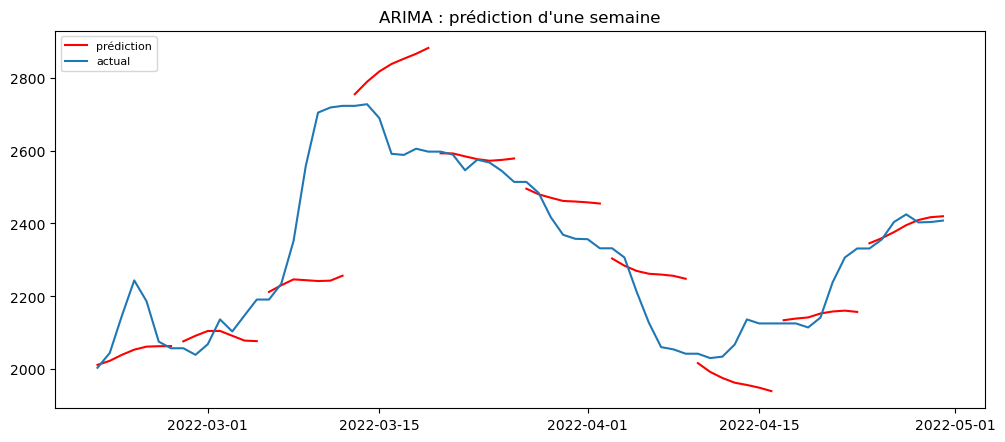

In [9]:
plt.figure(figsize=(12,5), dpi=100)
for i in range(len(prédictions)):
    if i==0:
        plt.plot(prédictions[i],color='r',label='prédiction')
    else:
        plt.plot(prédictions[i],color='r')
plt.plot(df[-70:].BDI, label='actual')

plt.title("ARIMA : prédiction d'une semaine")
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [10]:
values

[array([2012.4418723 , 2023.48433843, 2040.051763  , 2054.12923315,
        2062.37928674, 2063.57246943, 2063.92338202]),
 array([2076.89470647, 2092.21194877, 2105.29010276, 2105.49020463,
        2092.21562322, 2078.95474383, 2077.50070784]),
 array([2212.46401142, 2230.63704317, 2246.81726841, 2244.57394224,
        2242.2313515 , 2243.28946536, 2256.86256796]),
 array([2754.44949564, 2788.58110211, 2816.76779296, 2837.3623014 ,
        2851.64191991, 2865.21160511, 2881.29887777]),
 array([2592.39320306, 2592.10330985, 2583.98861486, 2576.43716745,
        2571.98134909, 2574.35459779, 2578.26302292]),
 array([2495.41634458, 2480.09768298, 2470.58111016, 2461.83205064,
        2460.19077557, 2457.95461797, 2454.77949075]),
 array([2304.04973164, 2284.39744745, 2270.01393236, 2262.19247049,
        2260.01781708, 2256.5221836 , 2248.50801388]),
 array([2017.274743  , 1993.17489982, 1976.49021236, 1963.5992813 ,
        1957.30815685, 1949.92720119, 1940.45909126]),
 array([2134.849